# Comprehensive Overview and Generalization of Neural Network Models for Multivariate Time Series Forecasting

## Notebook Overview
This notebook consolidates and compares the neural network architectures developed for multivariate time series forecasting, including autoencoders, standard LSTM and LSTM-based autoencoder.
It aims to summarize the preprocessing steps, model designs, and validation techniques employed, highlighting the strengths and limitations of each approach.
The goal is to provide a clear and practical reference for effectively applying neural network models to structured temporal data forecasting problems.

In [1]:
import pandas as pd
import numpy as np
import sys
import os
from sklearn.metrics import mean_squared_error
# Getting src path to import modules
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))

# Adding src path to the system path, if not already added
if src_path not in sys.path:
    sys.path.append(src_path)


from dl_models import AutoencoderRefined as aer
from dl_models import AutoencoderKfold as aek
from dl_models import LSTMBasic as lstm
from dl_models import LSTMKfold as lstmk
from dl_models import AutoencoderLSTM as ael
from dl_models import AutoencoderLSTMKfold as aelk
from utils import plots as plt

## Time series data for all buildings
building_1_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/Building_1.csv")
building_2_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/Building_2.csv")
building_3_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/Building_3.csv")

# Time series data for a specific building (Building_1.csv/Building_2.csv/Building_3.csv).
electricity_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/Building_1.csv")

# Carbon intensity data.
carbon_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/carbon_intensity.csv")

# Pricing data.
pricing_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/pricing.csv")

# Weather data.
weather_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/weather.csv")

# Target features to forecast
targets = ['cooling_demand', 'carbon_intensity', 'solar_generation']

# List of features used for training the autoencoder.
features = ['month', 'hour', 'day_type', 'daylight_savings_status', 'indoor_dry_bulb_temperature', 'average_unmet_cooling_setpoint_difference', 
            'indoor_relative_humidity', 'non_shiftable_load', 'dhw_demand', 'cooling_demand', 'heating_demand', 'solar_generation', 'occupant_count', 
            'indoor_dry_bulb_temperature_set_point', 'hvac_mode', 'carbon_intensity', 'electricity_pricing', 
            'electricity_pricing_predicted_6h', 'electricity_pricing_predicted_12h', 'electricity_pricing_predicted_24h', 
            'outdoor_dry_bulb_temperature', 'outdoor_relative_humidity', 'diffuse_solar_irradiance', 'direct_solar_irradiance', 
            'outdoor_dry_bulb_temperature_predicted_6h', 'outdoor_dry_bulb_temperature_predicted_12h', 'outdoor_dry_bulb_temperature_predicted_24h', 
            'outdoor_relative_humidity_predicted_6h', 'outdoor_relative_humidity_predicted_12h', 'outdoor_relative_humidity_predicted_24h', 
            'diffuse_solar_irradiance_predicted_6h', 'diffuse_solar_irradiance_predicted_12h', 'diffuse_solar_irradiance_predicted_24h', 
            'direct_solar_irradiance_predicted_6h', 'direct_solar_irradiance_predicted_12h', 'direct_solar_irradiance_predicted_24h']

# Concatenate train and test data
train_df = pd.concat([building_1_data, carbon_data, pricing_data, weather_data], axis=1)

# Concatenate the data from Building 2 and Building 3 vertically, creating a unified dataset for evaluation
building_2_3_data = pd.concat([building_2_data, building_3_data], axis=0, ignore_index=True)

# Combine carbon intensity, pricing, and weather data horizontally to align with building data
external_data = pd.concat([carbon_data, pricing_data, weather_data], axis=1)

# Repeat the external data (carbon, pricing, weather) to match the number of rows in Building 2 and 3 data
external_data_repeated = pd.concat([external_data] * 2, axis=0, ignore_index=True)

# Combine the building data and the repeated external data horizontally, preparing the final test dataset
test_df = pd.concat([building_2_3_data, external_data_repeated], axis=1)

df1 = pd.concat([electricity_data, carbon_data, pricing_data, weather_data], axis=1)

electricity_d = pd.read_csv("../data/citylearn_challenge_2023_phase_1/Building_2.csv")
df2 = pd.concat([electricity_d, carbon_data, pricing_data, weather_data], axis=1)

## Building 1 for training, Building 2&3 for testing

In [2]:
real_aer, pred_aer, _ = aer.Autoencoder(train_df=train_df, test_df=test_df, features=features, epochs = 3000, latent_dim = 32, batch_size = 128)

Epoch 1/3000
6/6 [==============================] - 2s 6ms/step - loss: 0.1310 - mean_absolute_error: 0.3223
Epoch 2/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.1149 - mean_absolute_error: 0.3032
Epoch 3/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.0968 - mean_absolute_error: 0.2785
Epoch 4/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.0790 - mean_absolute_error: 0.2496
Epoch 5/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.0646 - mean_absolute_error: 0.2209
Epoch 6/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.0548 - mean_absolute_error: 0.1964
Epoch 7/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.0483 - mean_absolute_error: 0.1774
Epoch 8/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.0435 - mean_absolute_error: 0.1635
Epoch 9/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.0394 - mean_absolute_error: 0.1525
Epoch 10/3000
6/6 [

In [3]:
real_lstm, _, pred_lstm, _ = lstm.lstm_forecast(train_df=train_df, test_df=test_df, features=features, epochs = 150, hidden_units = 16, batch_size = 16, timesteps = 3)

Epoch 1/150
45/45 - 3s - loss: 0.0548 - 3s/epoch - 58ms/step
Epoch 2/150
45/45 - 0s - loss: 0.0240 - 159ms/epoch - 4ms/step
Epoch 3/150
45/45 - 0s - loss: 0.0203 - 151ms/epoch - 3ms/step
Epoch 4/150
45/45 - 0s - loss: 0.0181 - 150ms/epoch - 3ms/step
Epoch 5/150
45/45 - 0s - loss: 0.0165 - 146ms/epoch - 3ms/step
Epoch 6/150
45/45 - 0s - loss: 0.0153 - 147ms/epoch - 3ms/step
Epoch 7/150
45/45 - 0s - loss: 0.0142 - 153ms/epoch - 3ms/step
Epoch 8/150
45/45 - 0s - loss: 0.0136 - 148ms/epoch - 3ms/step
Epoch 9/150
45/45 - 0s - loss: 0.0133 - 151ms/epoch - 3ms/step
Epoch 10/150
45/45 - 0s - loss: 0.0127 - 148ms/epoch - 3ms/step
Epoch 11/150
45/45 - 0s - loss: 0.0123 - 147ms/epoch - 3ms/step
Epoch 12/150
45/45 - 0s - loss: 0.0120 - 154ms/epoch - 3ms/step
Epoch 13/150
45/45 - 0s - loss: 0.0115 - 150ms/epoch - 3ms/step
Epoch 14/150
45/45 - 0s - loss: 0.0114 - 156ms/epoch - 3ms/step
Epoch 15/150
45/45 - 0s - loss: 0.0111 - 152ms/epoch - 3ms/step
Epoch 16/150
45/45 - 0s - loss: 0.0107 - 152ms/epoc

In [4]:
real_ael, pred_ael, _ = ael.Autoencoder(train_df=train_df, test_df=test_df, features=features, epochs = 150, batch_size = 64, latent_dim = 256, timesteps = 6)

Epoch 1/150
12/12 [==============================] - 2s 36ms/step - loss: 0.1272
Epoch 2/150
12/12 [==============================] - 0s 30ms/step - loss: 0.0639
Epoch 3/150
12/12 [==============================] - 0s 33ms/step - loss: 0.0410
Epoch 4/150
12/12 [==============================] - 0s 35ms/step - loss: 0.0295
Epoch 5/150
12/12 [==============================] - 0s 33ms/step - loss: 0.0232
Epoch 6/150
12/12 [==============================] - 0s 39ms/step - loss: 0.0195
Epoch 7/150
12/12 [==============================] - 0s 37ms/step - loss: 0.0176
Epoch 8/150
12/12 [==============================] - 0s 34ms/step - loss: 0.0162
Epoch 9/150
12/12 [==============================] - 0s 36ms/step - loss: 0.0153
Epoch 10/150
12/12 [==============================] - 0s 32ms/step - loss: 0.0144
Epoch 11/150
12/12 [==============================] - 0s 35ms/step - loss: 0.0137
Epoch 12/150
12/12 [==============================] - 0s 35ms/step - loss: 0.0129
Epoch 13/150
12/12 [=====

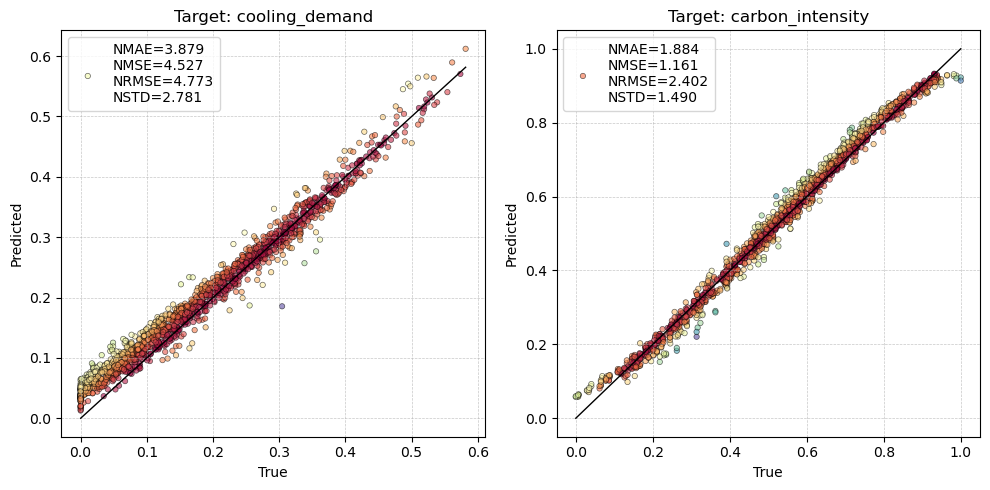

In [5]:
plt.plot_targets(real_aer, pred_aer, targets[:2], features, percent=True)

IndexError: index 9 is out of bounds for axis 1 with size 3

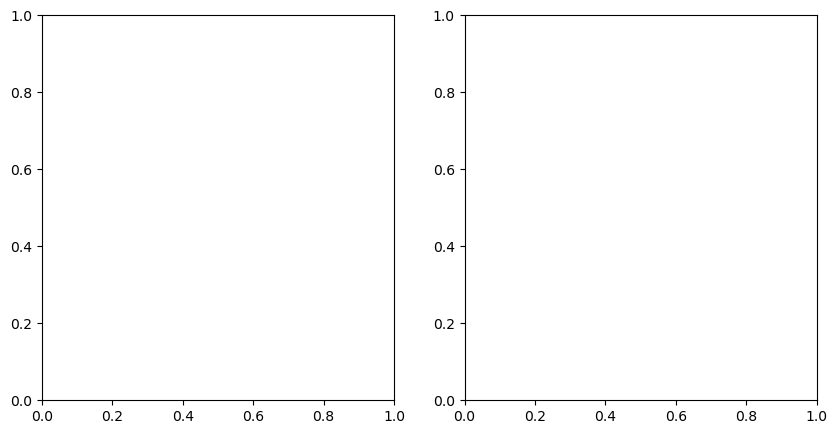

In [6]:
plt.plot_targets(real_lstm, pred_lstm, targets[:2], features, percent=True)

In [ ]:
plt.plot_aelstm_targets(real_ael, pred_ael, targets[:2], features, percent=True)

## Tuning and Training with K-Fold Cross-Validation

In [ ]:
real_aek_tuning, pred_aek_tuning = aek.Autoencoder(dataframe=df1, features=features, epochs = 200, latent_dim = 64, batch_size = 32, kfold = 10)

In [ ]:
real_aek_train, pred_aek_train = aek.Autoencoder(dataframe=df2, features=features, epochs = 1000, latent_dim = 64, batch_size = 32)

In [ ]:
plt.plot_targets(real_aek_tuning, pred_aek_tuning, targets, features, percent=True)

In [ ]:
plt.plot_targets(real_aek_train, pred_aek_train, targets, features, percent=True)

In [ ]:
real_lstmk_tuning, pred_lsmtk_tuning = lstmk.lstm_forecast(dataframe = df1, features = features, epochs = 50, batch_size = 16, hidden_units = 16, timesteps = 3, kfold = 3)

In [ ]:
real_lstmk_train, pred_lsmtk_train = lstmk.lstm_forecast(dataframe=df2, features=features, epochs = 150, hidden_units = 16, batch_size = 16, timesteps = 3)

In [ ]:
plt.plot_targets(real_lstmk_tuning, pred_lsmtk_tuning, targets, features, percent=True)

In [ ]:
plt.plot_targets(real_lstmk_train, pred_lsmtk_train, targets, features, percent=True)

In [ ]:
real_aelk_tuning, pred_aelk_tuning = aelk.Autoencoder(dataframe = df1, features = features, epochs = 75, batch_size = 64, latent_dim = 256, timesteps = 6, kfold = 5)

In [ ]:
real_aelk_train, pred_aelk_train = aelk.Autoencoder(dataframe=df2, features=features, epochs = 150, latent_dim = 256, batch_size = 64, timesteps = 6)

In [ ]:
plt.plot_aelstm_targets(real_aelk_tuning, pred_aelk_tuning, targets, features, percent=True)

In [ ]:
plt.plot_aelstm_targets(real_aelk_train, pred_aelk_train, targets, features, percent=True)